# Challenge Telecom X: análise de evasão de clientes
* Autor: Müller Pereira
---

## Objetivo
Coletar, tratar, analisar os dados, e extrair insights valiosos para entender os fatores que levam à perda de clientes.

---

## 📌 Extração
 - Carregamento de bibliotecas
 - Leitura do conjunto de dados

 ---

In [160]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import ast

display(Markdown("### Carregamento das bibliotecas"))

### Carregamento das bibliotecas

In [161]:

display(Markdown('### Leitura do conjunto de dados'))
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

### Leitura do conjunto de dados

In [162]:
df = pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


## 🔧 Transformação

---

In [163]:
# Converte as colunas de string para dicionário, se necessário
for col in ['customer', 'phone', 'internet', 'account']:
    # Check if the value is a string before attempting literal_eval
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Expande cada coluna que contém dicionários em novas colunas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Remove as colunas originais
df = df.drop(columns=['customer', 'phone', 'internet', 'account'])

# Concatena com as colunas expandidas
df = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)

In [164]:
display(Markdown("### Análise inicial do conjunto de dados"))

display(Markdown("### Primeiras linhas"))
display(df.head())

display(Markdown("### Últimas linhas"))
display(df.tail())

display(Markdown("### Informação das variáveis"))
df.info()

display(Markdown("### Quantidade de valores únicos"))
df.nunique()

### Análise inicial do conjunto de dados

### Primeiras linhas

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Últimas linhas

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


### Informação das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Quantidade de valores únicos

customerID          7267
Churn                  3
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Charges.Monthly     1585
Charges.Total       6531
dtype: int64

In [165]:
display(Markdown("### Convertendo a coluna `Charges.Total` para float"))
# Substituir vírgulas por pontos (se necessário)
df['Charges.Total'] = df['Charges.Total'].astype(str).str.replace(',', '.', regex=False)

# Converter a coluna 'col1' para float
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

df.info()

### Convertendo a coluna `Charges.Total` para float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [166]:
display(Markdown("### Verificando valores ausentes"))
df.isna().sum()

### Verificando valores ausentes

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64

In [167]:
display(Markdown("## Tratando dados ausentes"))
df = df.dropna(subset=['Charges.Total'])
df.isna().sum()

## Tratando dados ausentes

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [168]:
display(Markdown("### Dados duplicados"))
df.duplicated().sum()

### Dados duplicados

0

### Características do Dataset

---
A partir das informações iniciais, podemos dizer que:
 - O conjunto de dados tem 7267 unidades amostrais com 21 variáveis
 - As vairáveis são:
  - `customerID`: número de identificação único de cada cliente
  - `Churn`: se o cliente deixou ou não é a empresa
  - `gender`: gênero (masculino e feminino)
  - `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
  - `Partner`: se o cliente possui ou não é parceiro ou parceira
  - `Dependents`: se o cliente possui ou não depende
  - `tenure`: meses de contrato do cliente
  - `PhoneService`: assinatura de serviço telefônico
  - `MultipleLines`:assisnatura de mais de uma linha de telefone
  - `InternetService`: assinatura de um provedor de internet
  - `OnlineSecurity`: assinatura adicional de segurança on-line
  - `OnlineBackup`: assinatura adicional de backup online
  - `DeviceProtection`: assinatura adicional de proteção no dispositivo
  - `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
  - `StreamingTV`: assinatura de TV a cabo
  - `StreamingMovies`: assinatura de streaming de filmes
  - `Contract`: tipo de contrato
  - `PaperlessBilling`: se o cliente preferir receber uma fatura online
  - `PaymentMethod`: forma de pagamento
  - `Charges.Monthly`: total de todos os serviços do cliente por mês
  - `Charges.Total`: gasto total pelo cliente

Além disso, os dados ausentes foram tratatos e não existe dados duplicados.

---

In [169]:
display(Markdown("### Remover colunas que não são relevantes"))
df_final = df.drop(['customerID', 'Partner', 'Dependents', 'MultipleLines', 'OnlineBackup', 
                    'DeviceProtection', 'PaperlessBilling'], axis=1)
df_final.head()

### Remover colunas que não são relevantes

,Churn,gender,SeniorCitizen,tenure,PhoneService,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,9,Yes,DSL,No,Yes,Yes,No,One year,Mailed check,65.6,593.30
1,No,Male,0,9,Yes,DSL,No,No,No,Yes,Month-to-month,Mailed check,59.9,542.40
2,Yes,Male,0,4,Yes,Fiber optic,No,No,No,No,Month-to-month,Electronic check,73.9,280.85
3,Yes,Male,1,13,Yes,Fiber optic,No,No,Yes,Yes,Month-to-month,Electronic check,98.0,1237.85
4,Yes,Female,1,3,Yes,Fiber optic,No,Yes,Yes,No,Month-to-month,Mailed check,83.9,267.40


In [170]:
display(Markdown("## Criação da coluna Contas_Diarias"))
# Cria a coluna 'Contas_Diarias' (valor diário proporcional)
df_final['Contas_Diarias'] = (df_final['Charges.Monthly'] / 30).round(2)

# Exemplo das primeiras linhas
df_final[['Charges.Monthly', 'Contas_Diarias']].head()

## Criação da coluna Contas_Diarias

,Charges.Monthly,Contas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


### Verificandos dados inconsistentes

In [171]:
df_final['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3607
Yes                    2074
No internet service    1575
Name: count, dtype: int64

> As colunas `OnlineSecurity`, `TechSupport`, `StreamingTV`, `StreamingMovies` apresentam valores "No internet service", que é referente a não possuir serviço de internet. Mudar para "No".

In [172]:
# Lista de colunas afetadas pela ausência de internet
colunas_servicos_online = [
    'OnlineSecurity', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

# Substituir "No internet service" → "No"
df_final[colunas_servicos_online] = df_final[colunas_servicos_online].replace(
    'No internet service',
    'No'
)

In [173]:
df_final['OnlineSecurity'].value_counts()

OnlineSecurity
No     5182
Yes    2074
Name: count, dtype: int64

In [174]:
df_final['Churn'].value_counts()

Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64

> A coluna `Churn` possui 224 valores sem classificação alguma. Excluir esses valores.

In [175]:
display(Markdown("### Padronização"))
# @title Padronização
# Lista de colunas binárias
colunas_binarias = [
    'Churn',
    'PhoneService',
    'OnlineSecurity',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Filtro para linhas válidas em todas as colunas binárias
filtro = df_final[colunas_binarias].isin(['Yes', 'No']).all(axis=1)
df_filtrado = df_final[filtro]

print(f"Linhas originais: {len(df)}")
print(f"Linhas após exclusão: {len(df_filtrado)}")
print(f"Linhas excluídas: {len(df) - len(df_filtrado)}")

# Converter "Yes/No" para 1/0
df_filtrado[colunas_binarias] = df_filtrado[colunas_binarias].replace({'Yes': '1', 'No': '0'})

# Converter SeniorCitizen para string
df_filtrado['SeniorCitizen']= df_filtrado['SeniorCitizen'].astype(str)

df_filtrado.head()

### Padronização

Linhas originais: 7256
Linhas após exclusão: 7032
Linhas excluídas: 224


C:\Users\mulle\AppData\Local\Temp\ipykernel_18560\1321755101.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[colunas_binarias] = df_filtrado[colunas_binarias].replace({'Yes': '1', 'No': '0'})
C:\Users\mulle\AppData\Local\Temp\ipykernel_18560\1321755101.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['SeniorCitizen']= df_filtrado['SeniorCitizen'].astype(str)


,Churn,gender,SeniorCitizen,tenure,PhoneService,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0,Female,0,9,1,DSL,0,1,1,0,One year,Mailed check,65.6,593.30,2.19
1,0,Male,0,9,1,DSL,0,0,0,1,Month-to-month,Mailed check,59.9,542.40,2.00
2,1,Male,0,4,1,Fiber optic,0,0,0,0,Month-to-month,Electronic check,73.9,280.85,2.46
3,1,Male,1,13,1,Fiber optic,0,0,1,1,Month-to-month,Electronic check,98.0,1237.85,3.27
4,1,Female,1,3,1,Fiber optic,0,1,1,0,Month-to-month,Mailed check,83.9,267.40,2.80


In [176]:
display(Markdown("### Dicionário de Dados"))
# @title Dicionário de Dados

df_dict = pd.DataFrame(
    [
        {'variavel': 'Churn', 'descricao': 'se o cliente deixou ou nao a empresa', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'gender', 'descricao': 'genero (masculino e feminino)', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'SeniorCitizen', 'descricao': 'informacao sobre um cliente ter ou nao idade igual ou maior que 65 anos', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'tenure', 'descricao': 'meses de contrato do cliente', 'tipo': 'quantitativa', 'subtipo': 'discreta'},
        {'variavel': 'PhoneService', 'descricao': 'assinatura de servico telefonico', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'InternetService', 'descricao': 'assinatura de um provedor de internet', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'OnlineSecurity', 'descricao': 'assinatura adicional de seguranca on-line', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'TechSupport', 'descricao': 'assinatura adicional de suporte tecnico, menos tempo de espera', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'StreamingTV', 'descricao': ' assinatura de TV a cabo', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'StreamingMovies', 'descricao': 'assinatura de streaming de filmes', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'Contract', 'descricao': 'tipo de contrato', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'PaymentMethod', 'descricao': 'forma de pagamento', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'Charges.Monthly', 'descricao': 'total de todos os servicos do cliente por mes', 'tipo': 'quantitativa', 'subtipo': 'continua'},
        {'variavel': 'Charges.Total', 'descricao': 'gasto total pelo cliente', 'tipo': 'quantitativa', 'subtipo': 'continua'},
        {'variavel': 'Contas_Diarias', 'descricao': ' calcula o valor diário aproximado', 'tipo': 'quantitativa', 'subtipo': 'continua'}
    ]
)
df_dict

### Dicionário de Dados

,variavel,descricao,tipo,subtipo
0,Churn,se o cliente deixou ou nao a empresa,qualitativa,nominal
1,gender,genero (masculino e feminino),qualitativa,nominal
2,SeniorCitizen,informacao sobre um cliente ter ou nao idade i...,qualitativa,nominal
3,tenure,meses de contrato do cliente,quantitativa,discreta
4,PhoneService,assinatura de servico telefonico,qualitativa,nominal
5,InternetService,assinatura de um provedor de internet,qualitativa,nominal
6,OnlineSecurity,assinatura adicional de seguranca on-line,qualitativa,nominal
7,TechSupport,"assinatura adicional de suporte tecnico, menos...",qualitativa,nominal
8,StreamingTV,assinatura de TV a cabo,qualitativa,nominal
9,StreamingMovies,assinatura de streaming de filmes,qualitativa,nominal


## 📊 Carga e Análise

---

In [177]:
display(Markdown("### Estatística Descritiva"))

display(Markdown("### Variáveis qualitativas"))
print(df_filtrado.describe(include='object'))

display(Markdown("### Variáveis quantitativas"))
print(df_filtrado.describe())

### Estatística Descritiva

### Variáveis qualitativas

       Churn gender SeniorCitizen PhoneService InternetService OnlineSecurity  \
count   7032   7032          7032         7032            7032           7032   
unique     2      2             2            2               3              2   
top        0   Male             0            1     Fiber optic              0   
freq    5163   3549          5890         6352            3096           5017   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7032        7032            7032            7032   
unique           2           2               2               3   
top              0           0               0  Month-to-month   
freq          4992        4329            4301            3875   

           PaymentMethod  
count               7032  
unique                 4  
top     Electronic check  
freq                2365  


### Variáveis quantitativas

            tenure  Charges.Monthly  Charges.Total  Contas_Diarias
count  7032.000000      7032.000000    7032.000000     7032.000000
mean     32.421786        64.798208    2283.300441        2.159891
std      24.545260        30.085974    2266.771362        1.002955
min       1.000000        18.250000      18.800000        0.610000
25%       9.000000        35.587500     401.450000        1.187500
50%      29.000000        70.350000    1397.475000        2.340000
75%      55.000000        89.862500    3794.737500        2.992500
max      72.000000       118.750000    8684.800000        3.960000


### 📋 Análise Estatística Descritiva

---

### 🔸 Variáveis Qualitativas (Categóricas)

| Variável           | Modalidade mais comum (Top) | Frequência | Total de categorias (Unique) | Interpretação |
|--------------------|-----------------------------|------------|-------------------------------|----------------|
| **Churn**          | 0 (Não cancelaram)          | 5163       | 2                             | A maioria dos clientes permanece na base (~73%). |
| **Gender**         | Masculino                   | 3549       | 2                             | Equilíbrio entre gêneros (Masculino ~50.5%). |
| **SeniorCitizen**  | 0 (Não idosos)              | 5890       | 2                             | Apenas ~16% são idosos, o que reflete na distribuição de churn. |
| **PhoneService**   | 1 (Com serviço)             | 6352       | 2                             | A maioria dos clientes utiliza o serviço telefônico. |
| **InternetService**| Fiber optic                 | 3096       | 3                             | A tecnologia de fibra é a mais utilizada (~44%). |
| **OnlineSecurity** | 0 (Sem segurança)           | 5017       | 2                             | Cerca de 71% dos clientes não possuem serviço de segurança online. |
| **TechSupport**    | 0 (Sem suporte)             | 4992       | 2                             | A maioria dos clientes não possui suporte técnico (~71%). |
| **StreamingTV**    | 0 (Sem serviço)             | 4329       | 2                             | A maioria não utiliza o serviço de streaming de TV (~62%). |
| **StreamingMovies**| 0 (Sem serviço)             | 4301       | 2                             | Semelhante ao de TV (~61%). |
| **Contract**       | Month-to-month              | 3875       | 3                             | Contratos mensais são predominantes (~55%). |
| **PaymentMethod**  | Electronic check            | 2365       | 4                             | Cheque eletrônico é o mais usado (~33.6%). |

**🧠 Insight:**  
As categorias mais associadas ao **churn** (como uso de fibra, cheque eletrônico e contratos mensais) coincidem com as mais frequentes, o que pode indicar um **perfil de cliente com maior risco de cancelamento**.

---

### 🔹 Variáveis Quantitativas (Numéricas)

#### **1. `tenure` (Tempo de permanência em meses)**

- Média: 32,42 meses  
- Mediana: 29 meses  
- Mínimo: 1 mês  
- Máximo: 72 meses  
- Desvio padrão: 24,54  
- Q1 (25%): 9 meses  
- Q3 (75%): 55 meses

**Interpretação:**  
A maioria dos clientes permanece por **menos de 3 anos**, com **mediana menor que a média**, indicando assimetria à direita (muitos clientes com baixa permanência). O desvio padrão alto mostra grande dispersão.

---

#### **2. `Charges.Monthly` (Cobrança Mensal)**

- Média: R$ 64,80  
- Mediana: R$ 70,35  
- Mínimo: R$ 18,25  
- Máximo: R$ 118,75  
- Desvio padrão: R$ 30,09  
- Q1 (25%): R$ 35,59  
- Q3 (75%): R$ 89,86

**Interpretação:**  
Clientes pagam, em média, R$ 64,80 por mês, com ampla variação (DP = 30). A **mediana é maior que a média**, sugerindo leve assimetria à esquerda (alguns clientes com valores muito baixos).

---

#### **3. `Charges.Total` (Cobrança Total Acumulada)**

- Média: R$ 2.283,30  
- Mediana: R$ 1.397,48  
- Mínimo: R$ 18,80  
- Máximo: R$ 8.684,80  
- Desvio padrão: R$ 2.266,77  
- Q1 (25%): R$ 401,45  
- Q3 (75%): R$ 3.794,74

**Interpretação:**  
Essa variável reflete o tempo de permanência: **clientes fiéis acumulam altos valores**. A média é muito maior que a mediana, indicando que **poucos clientes com alto tempo de permanência puxam a média para cima**.

---

#### **4. `Contas_Diarias` (Fator de uso diário)**

- Média: 2,16  
- Mediana: 2,34  
- Mínimo: 0,61  
- Máximo: 3,96  
- Desvio padrão: 1,00  
- Q1 (25%): 1,19  
- Q3 (75%): 2,99

**Interpretação:**  
Distribuição relativamente simétrica e centrada ao redor da média de ~2. Valores baixos (<1.5) podem indicar **baixa utilização**, o que pode estar associado à **insatisfação e maior propensão ao churn**.

---

### 📌 Resumo dos Principais Pontos

| Indicador             | Ponto-chave |
|-----------------------|-------------|
| `tenure`              | Alta taxa de churn nos primeiros meses. |
| `Charges.Monthly`     | Clientes com mensalidades mais altas tendem a cancelar mais. |
| `Charges.Total`       | Cancelamentos ocorrem majoritariamente antes do acúmulo de receita significativa. |
| `Contas_Diarias`      | Baixo uso diário pode indicar menor engajamento e maior risco. |
| Variáveis categóricas | Contrato, segurança, suporte técnico e forma de pagamento têm alto poder explicativo. |


### Gráficos de Setores

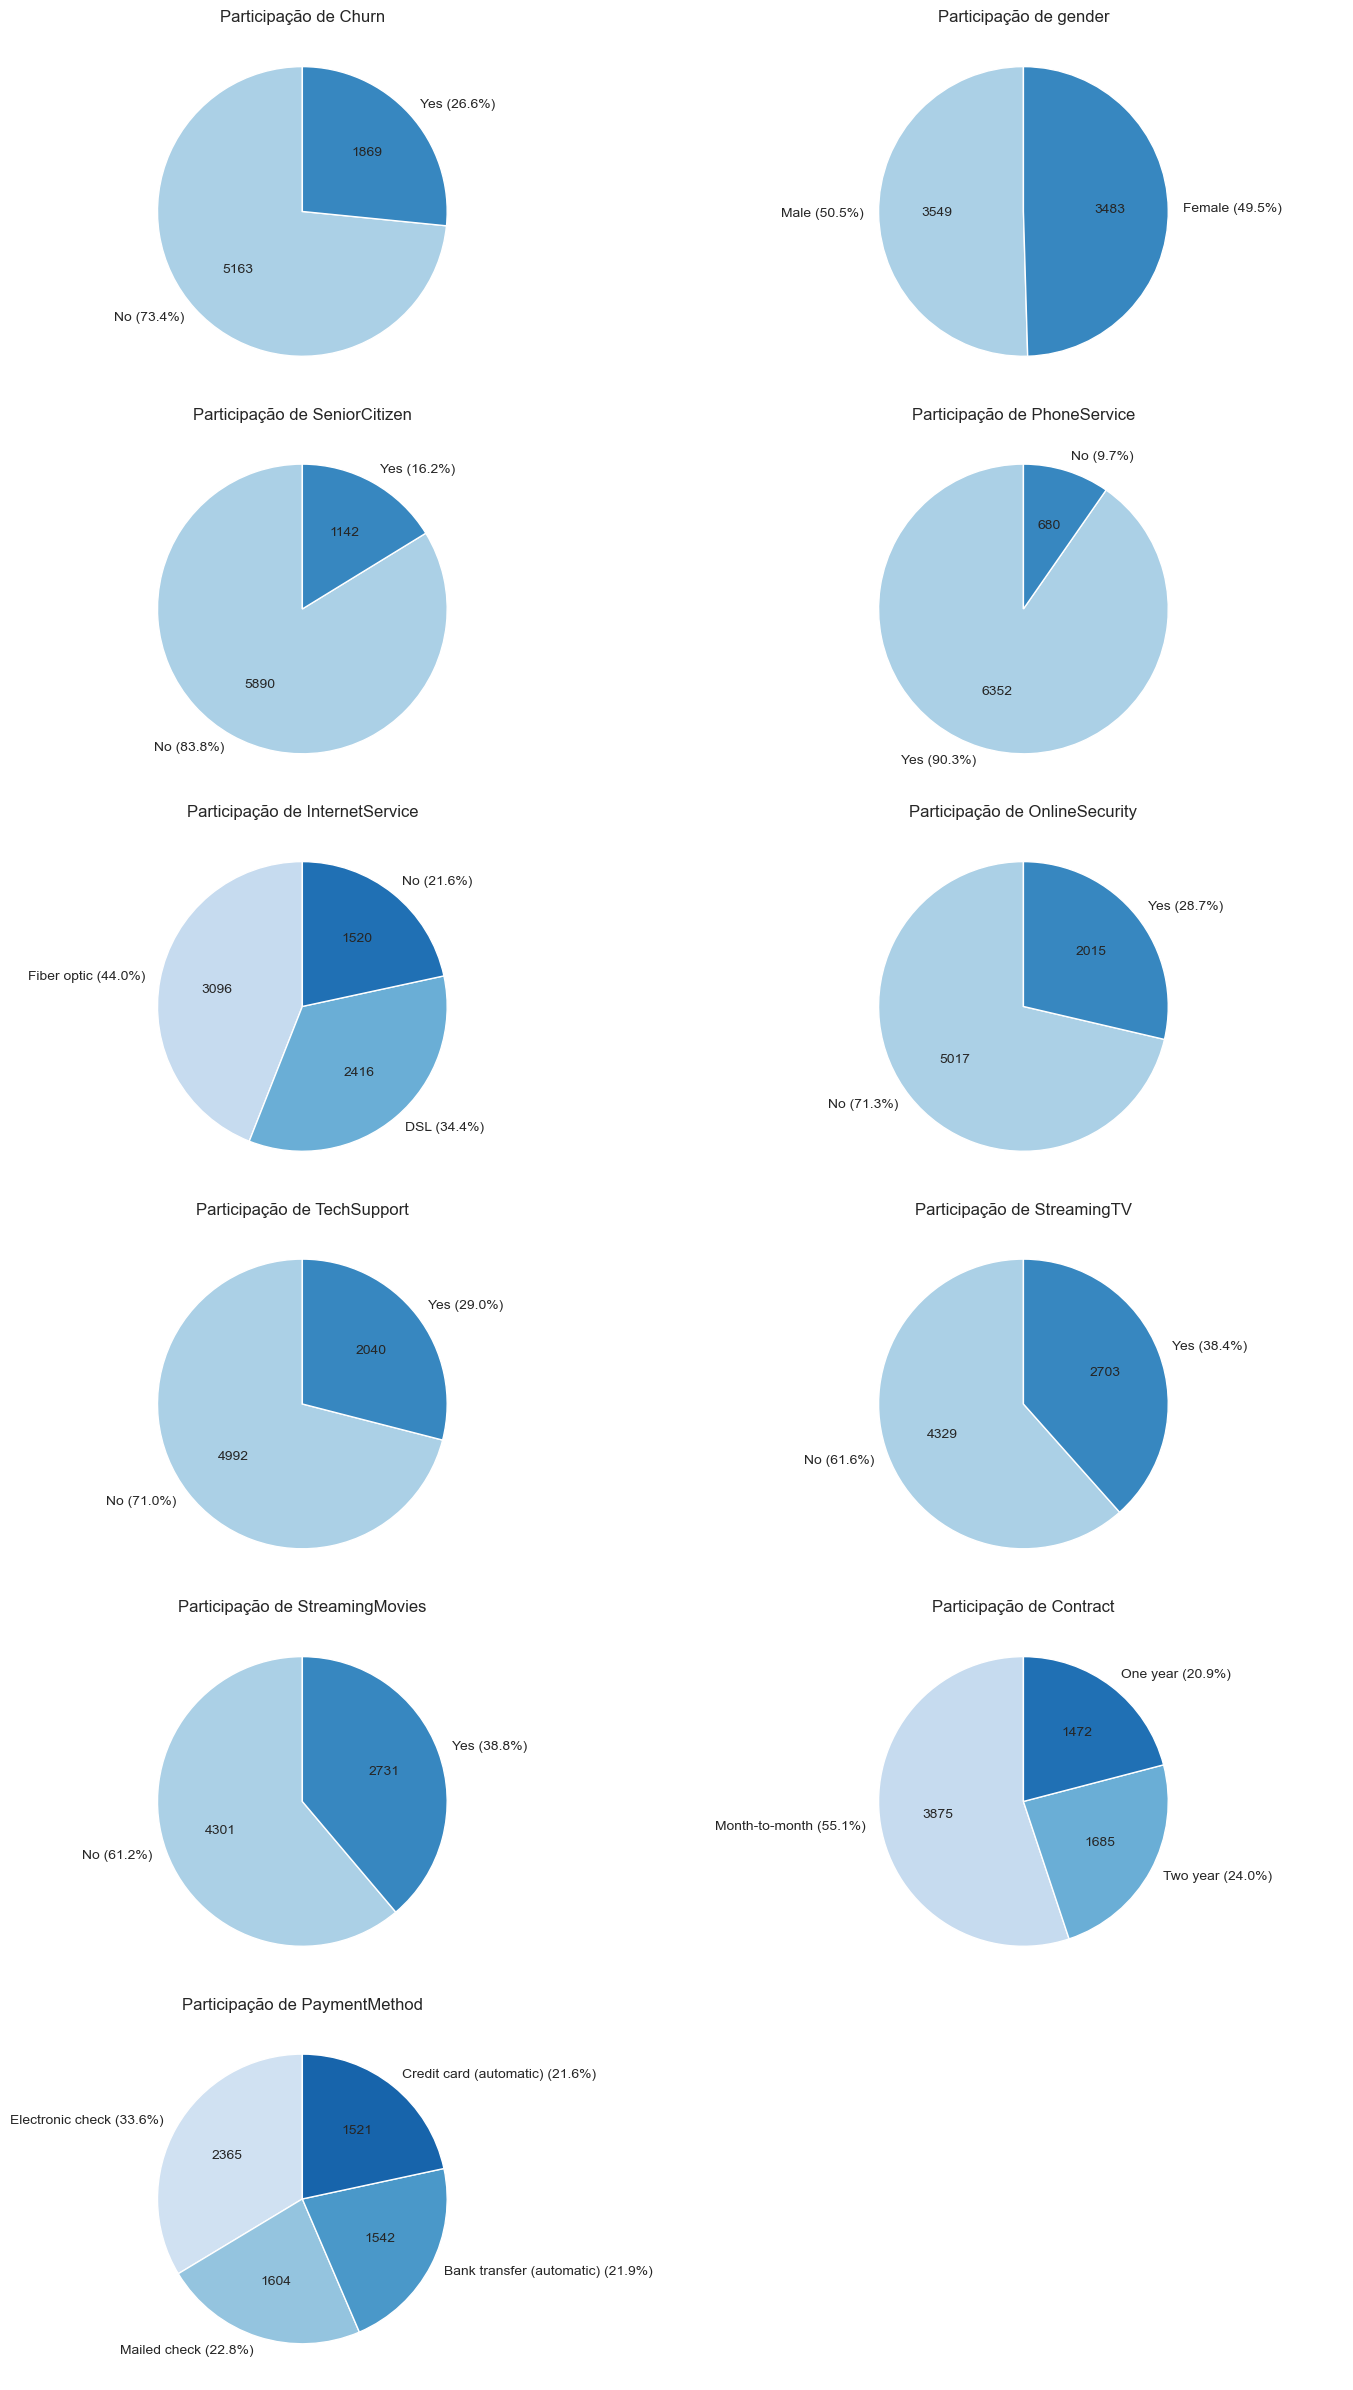

In [178]:
display(Markdown("### Gráficos de Setores"))
# Ajustar layout para múltiplos gráficos de pizza de variáveis categóricas
variaveis_qualitativas = df_dict.query("tipo == 'qualitativa'").variavel.to_list()

# Lista de variáveis binárias (0/1 que representam No/Yes para plotagem)
variaveis_binarias = ['Churn', 'SeniorCitizen', 'PhoneService', 'OnlineSecurity', 'TechSupport',
                      'StreamingTV', 'StreamingMovies']

# Redefinir número de colunas e linhas para os subplots (usando 2 colunas)
ncols = 2
nrows = int(np.ceil(len(variaveis_qualitativas) / ncols))  # Calcular o número de linhas com base no número de variáveis

# Criar figura e eixos com tamanho ajustado
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 4))
axes = axes.flatten()

# Iterar pelas variáveis qualitativas para criar cada gráfico de pizza
for i, variavel in enumerate(variaveis_qualitativas):

    # Verificar se o índice i está dentro dos limites dos eixos
    if i < len(axes):
        # Obter as contagens absolutas para cada categoria da variável
        counts = df_filtrado[variavel].value_counts()
        # Converter os índices para string (para a plotagem)
        etiquetas = counts.index.astype(str)
        
        # Se a variável for binária, trocar os valores "0"/"1" por "No"/"Yes" somente na plotagem
        if variavel in variaveis_binarias:
            etiquetas = ['Yes' if lbl.strip() == '1' else 'No' for lbl in etiquetas]

        valores = counts.values
        
        ax = axes[i]
        
        # Criar gráfico de pizza com autopct vazio para customização manual
        wedges, texts, autotexts = ax.pie(
            valores,
            labels=etiquetas,
            autopct='',
            startangle=90,
            colors=sns.color_palette("Blues", n_colors=len(etiquetas)),
            wedgeprops={"edgecolor": "white"}
        )
        
        # Adicionar os valores absolutos dentro das fatias
        for autotext, valor in zip(autotexts, valores):
            autotext.set_text(f'{valor}')
        
        # Calcular as porcentagens para cada fatia
        porcentagens = valores / valores.sum() * 100
        # Atualizar os textos das labels para exibir a porcentagem ao lado da etiqueta
        for text, pct in zip(texts, porcentagens):
            text.set_text(f'{text.get_text()} ({pct:.1f}%)')
        
        # Definir título do gráfico
        ax.set_title(f"Participação de {variavel}", fontsize=12)
    else:
        # Esta condição não deve ser alcançada se nrows e ncols forem calculados corretamente,
        # mas serve como proteção caso existam mais variáveis do que subplots.
        print(f"Aviso: Não há subplots suficientes para a variável '{variavel}'")

# Remover eixos vazios, se houver
for j in range(len(variaveis_qualitativas), len(axes)):
    axes[j].axis("off")

# Ajustar layout e exibir figura
plt.tight_layout()
plt.show()

---
### Análise dos Gráficos de Setores

- **Churn (Cancelamento de Serviço)**: A maioria dos clientes (73,4%) não cancelou o serviço, enquanto 26,6% o fizeram. Isso sugere uma taxa de churn relativamente alta, que pode merecer uma análise mais aprofundada sobre os motivos da saída dos clientes.
- **Gênero**: A distribuição entre homens e mulheres é quase equilibrada, com uma pequena vantagem para os homens (50,5% contra 49,5%).
- **Senior Citizen (Idosos)**: Apenas 16,2% dos clientes são idosos, enquanto a grande maioria (83,8%) não pertence a essa faixa etária. Isso pode ter implicações sobre preferências e uso de serviços.
- **Serviço Telefônico**: Quase todos os clientes (90,3%) possuem serviço telefônico, enquanto apenas 9,7% não têm.
- **Serviço de Internet**: A maior parte dos clientes tem internet via fibra óptica (44%), seguida por DSL (34,4%), e um grupo menor (21,6%) não utiliza internet.
- **Segurança Online e Suporte Técnico**: Muitos clientes não possuem serviços de segurança online (71,3%) nem suporte técnico (71%), o que pode indicar oportunidades para aumentar a adesão a esses serviços.
- **Streaming de TV e Filmes**: Aproximadamente 38% dos clientes utilizam serviços de streaming de TV e filmes, enquanto cerca de 61% não aderiram.
- **Tipo de Contrato**: A maioria dos clientes (55,1%) escolhe contratos mensais, o que pode indicar menor fidelidade e maior risco de churn.
- **Método de Pagamento**: O pagamento por cheque eletrônico é o mais comum (33,6%), enquanto os demais métodos (cartão de crédito automático, transferência bancária e cheque físico) têm distribuições similares.

---

### Gráficos de barras agrupados (Churn vs variáveis categóricas)

C:\Users\mulle\AppData\Local\Temp\ipykernel_18560\524799199.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
C:\Users\mulle\AppData\Local\Temp\ipykernel_18560\524799199.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
C:\Users\mulle\AppData\Local\Temp\ipykernel_18560\524799199.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
C:\Users\mulle\AppData\Local\Temp\ipykernel_18560\524799199.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
C:\Users\mulle\AppData\Local\Temp\ipykernel_18560\524799199.py:49: UserWarning: set_ticklabels() should 

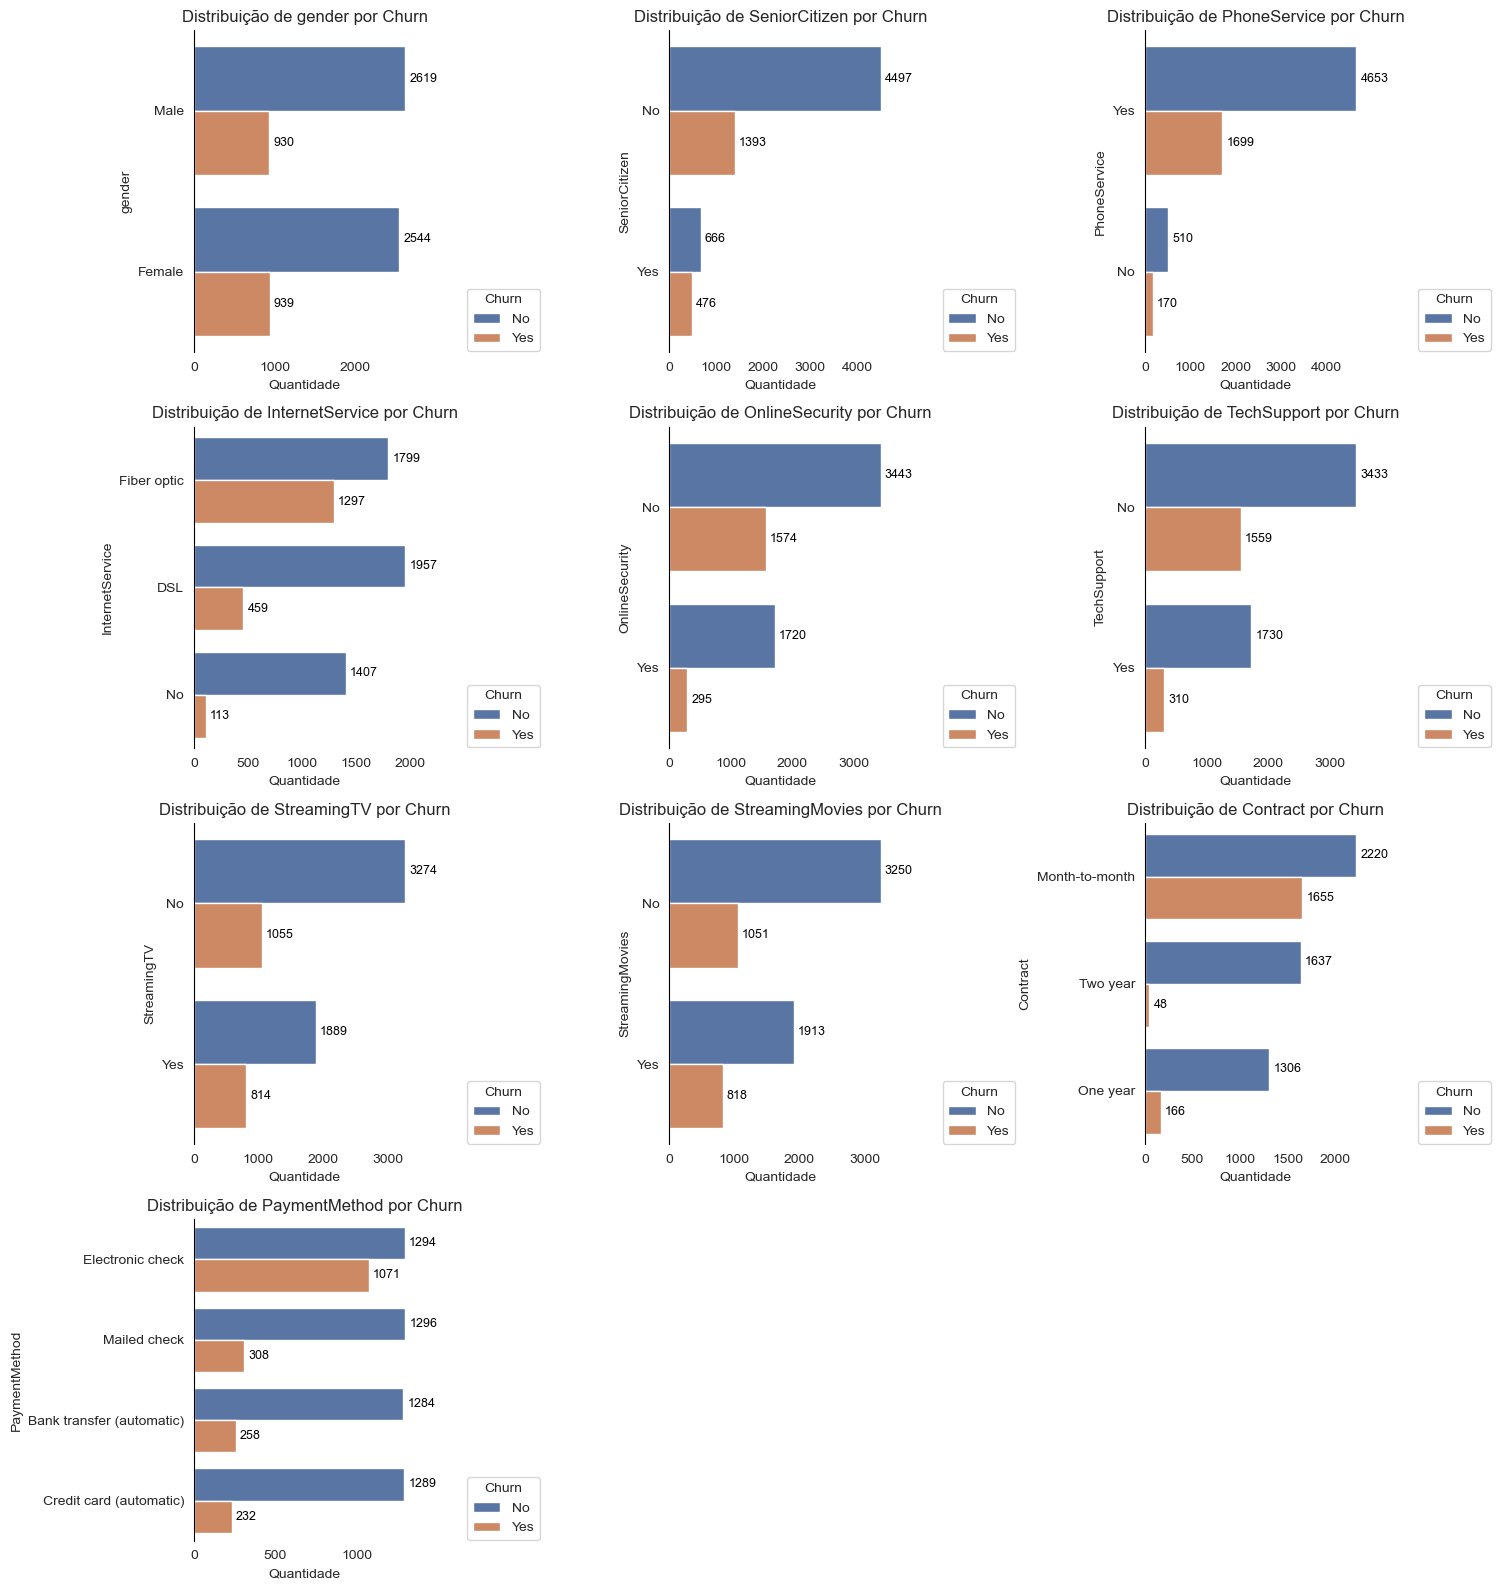

In [179]:
display(Markdown("### Gráficos de barras agrupados (Churn vs variáveis categóricas)"))

# Definir a paleta de cores customizada: "No" em azul escuro e "Yes" em laranja
nova_palette = {"No": "#4c72b0", "Yes": "#dd8452"}

ncols = 3
variaveis_analise = [v for v in variaveis_qualitativas if v != 'Churn']
nrows = (len(variaveis_analise) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
axes = axes.flatten()

for i, variavel in enumerate(variaveis_analise):
    ax = axes[i]

    # Obter ordem de categorias
    order = df_filtrado[variavel].value_counts().index

    # Gráfico de barras agrupado com hue definido a partir de Churn mapeado para "No"/"Yes"
    sns.countplot(
        data=df_filtrado,
        y=variavel,
        hue=df_filtrado["Churn"].map({'0': "No", '1': "Yes"}),
        order=order,
        palette=nova_palette,  # Usa a paleta customizada
        ax=ax,
        alpha=1
    )

    # Mover legenda para fora
    ax.legend(title="Churn", loc="center left", bbox_to_anchor=(1.2, 0.1))
    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Reserva espaço à direita

    # Adiciona os valores absolutos nas barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9, color='black')

    # Ajustar títulos e rótulos dos eixos
    ax.set(title=f"Distribuição de {variavel} por Churn", xlabel="Quantidade", ylabel=variavel)
    ax.set_facecolor("white")
    ax.grid(axis='x', visible=False)
    for side in ["top", "right", "bottom"]:
        ax.spines[side].set_visible(False)
        ax.spines["left"].set_color("black")

    # Melhorar a legibilidade do eixo y para variáveis binárias
    if variavel in variaveis_binarias:
        labels = ['Yes' if val == '1' else 'No' for val in order]
        ax.set_yticklabels(labels)

# Ocultar eixos vazios
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

---
### Análise dos Gráficos de Barras

1. **Gênero**
    - Masculino: 2619 clientes que não cancelaram versus 930 que cancelaram.
    - Feminino: 2544 clientes que não cancelaram versus 939 que cancelaram.

    Embora os números absolutos mostrem uma distribuição muito equilibrada entre homens e mulheres, as taxas de cancelamento são bastante similares, sugerindo que o fator gênero, por si só, pode não ser um forte determinante para o churn.

2. **Senior Citizen (Idosos)**
    - Não idosos: 4497 sem churn e 1393 com churn.
    - Idosos: 686 sem churn e 476 com churn.

    Aqui observa-se uma diferença marcante: os clientes idosos apresentam uma taxa de churn significativamente maior (cerca de 40,9%) em comparação aos não idosos (aproximadamente 23,7%). Esse dado pode indicar que fatores como adaptação tecnológica ou necessidades específicas podem impactar a permanência dos clientes mais velhos.

3. **Phone Service (Serviço Telefônico)**
    - Sem serviço: 510 sem churn e 170 com churn.
    - Com serviço: 4653 sem churn e 1699 com churn.

    As taxas de cancelamento estão relativamente próximas entre os grupos (em torno de 25% a 27%), sugerindo que a disponibilidade ou não do serviço telefônico não seja um fator determinante para a decisão de cancelar.

4. **Internet Service (Serviço de Internet)**
    - Fibra Óptica: 1799 sem churn e 1297 com churn (~41,9% de churn).
    - DSL: 1957 sem churn e 459 com churn (~19,0% de churn).
    - Sem internet: 1407 sem churn e 113 com churn (~7,4% de churn).

    É revelador que os clientes com internet via fibra óptica tem uma taxa de churn muito mais elevada. Isso pode significar que, embora a fibra seja uma tecnologia superior, pode haver questões relacionadas à qualidade, preço ou expectativas dos clientes que a utilizam, impactando a fidelidade.

5. **Online Security (Segurança Online)**
    - Sem segurança: 3433 sem churn e 1574 com churn (~31,5% de churn).
    - Com segurança: 1720 sem churn e 295 com churn (~14,6% de churn).

    A presença do serviço de segurança online parece ter um efeito protetor, com clientes assinantes apresentando taxas de cancelamento consideravelmente menores. Pode ser que esses clientes valorizem a oferta ou correlacionem a segurança com um serviço de maior qualidade.

6. **Tech Support (Suporte Técnico)**
    - Sem suporte: 3433 sem churn e 1559 com churn (~31,2% de churn).
    - Com suporte: 1730 sem churn e 310 com churn (~15,2% de churn).

    Semelhante ao caso da segurança online, a disponibilidade de suporte técnico reduz significativamente a taxa de churn, sugerindo que o suporte de qualidade é um diferencial importante para manter os clientes.

7. **Streaming TV**
    - Sem streaming: 3274 sem churn e 1055 com churn (~24,4% de churn).
    - Com streaming: 1689 sem churn e 814 com churn (~32,5% de churn).

    Curiosamente, os clientes que assinam o serviço de streaming de TV têm uma taxa de cancelamento mais elevada. Essa tendência pode indicar que, ao adicionar esse serviço na conta, os clientes se expõem a custos mais altos ou possivelmente esperam mais em termos de qualidade e variedade, o que, se não for atendido, os leva a cancelar.

8. **Streaming Movies (Filmes)**
    - Sem streaming: 3250 sem churn e 1051 com churn (~24,4% de churn).
    - Com streaming: 1913 sem churn e 818 com churn (~30,0% de churn).

    A situação é similar ao streaming de TV: a adesão a filmes em streaming está associada a uma taxa de churn ligeiramente maior, sugerindo que a inclusão deste serviço pode refletir segmentos de clientes mais sensíveis a custos ou com maiores expectativas.

9. **Contract (Tipo de Contrato)**
    - Month-to-month: 2220 sem churn e 1655 com churn (~42,7% de churn).
    - One year: 1306 sem churn e 166 com churn (~11,3% de churn).
    - Two year: 1937 sem churn e 48 com churn (~2,4% de churn).

    Aqui a influência do compromisso contratual é extremamente evidente. Clientes com contrato mês a mês têm uma taxa de cancelamento muito alta em comparação com aqueles que firmam contratos de um ou dois anos. Contratos de longo prazo parecem garantir uma fidelização muito maior, seja por benefícios ou por barreiras contratuais.

10. **Payment Method (Método de Pagamento)**
    - Electronic check (Cheque Eletrônico): 1294 sem churn e 1071 com churn (~45,3% de churn).
    - Mailed check (Cheque Enviado pelo Correio): 1296 sem churn e 308 com churn (~19,2% de churn).
    - Bank transfer (automatic) (Transferência Bancária Automática): 1284 sem churn e 256 com churn (~16,6% de churn).
    - Credit card (automatic) (Cartão de Crédito Automático): 1299 sem churn e 232 com churn (~15,2% de churn).

    O método de pagamento via cheque eletrônico se destaca com uma taxa de churn quase três vezes superior à dos demais métodos. Essa discrepância pode estar relacionada a questões de praticidade, segurança ou até mesmo a um perfil de clientes mais volátil que prefere essa forma de pagamento.

---

### Distribuição das variáveis numéricas com relação a Churn

C:\Users\mulle\AppData\Local\Temp\ipykernel_18560\1070797490.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_box = sns.boxplot(
C:\Users\mulle\AppData\Local\Temp\ipykernel_18560\1070797490.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_box.set_xticklabels(["No", "Yes"])
C:\Users\mulle\AppData\Local\Temp\ipykernel_18560\1070797490.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_box = sns.boxplot(
C:\Users\mulle\AppData\Local\Temp\ipykernel_18560\1070797490.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_box.set_xtick

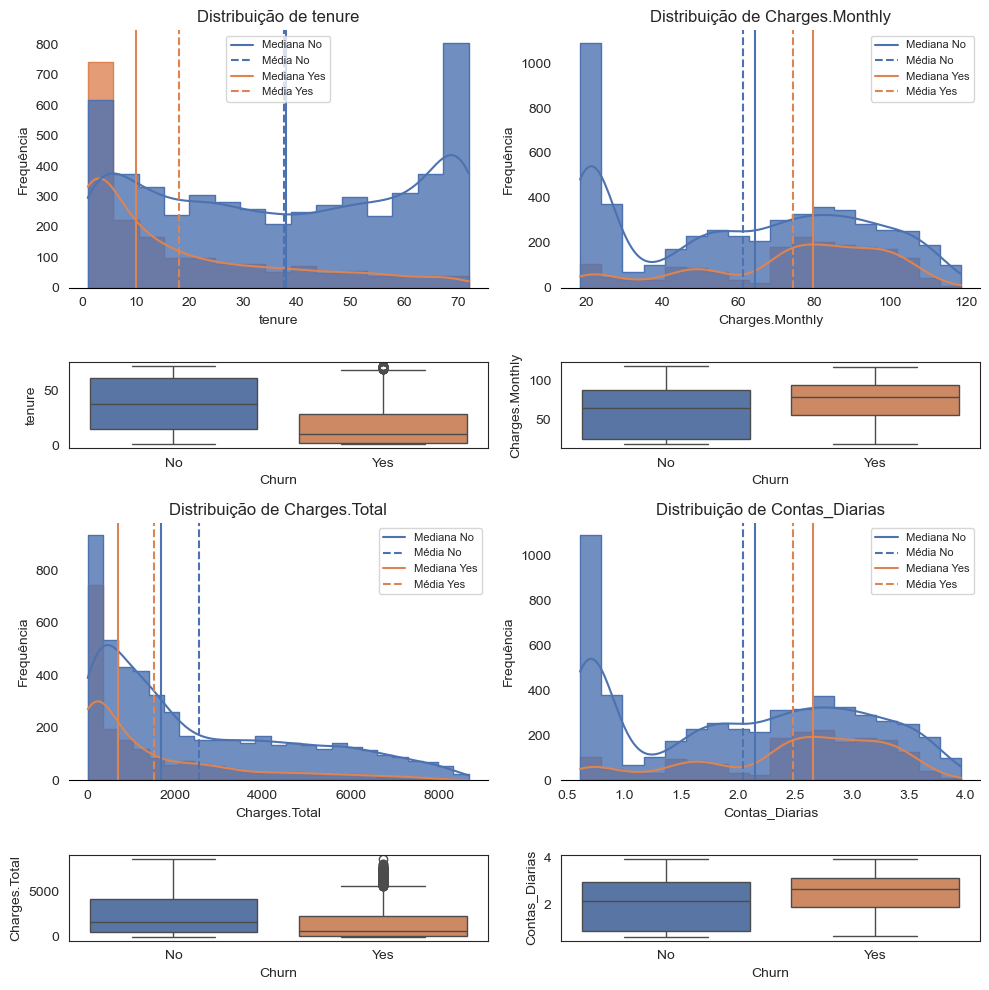

In [180]:
# @title Distribuição das variáveis numéricas com relação a Churn

display(Markdown("### Distribuição das variáveis numéricas com relação a Churn"))

variaveis_quantitativas = df_dict.query("tipo == 'quantitativa'").variavel.to_list()

n = len(variaveis_quantitativas)
ncols = 2
nrows = (n + 1) // ncols  # Arredondamento para cima

# Cada variável usa 2 linhas: uma para histograma/KDE e outra para boxplot
fig, axes = plt.subplots(
    figsize=(10, 5 * nrows),
    nrows=nrows * 2,
    ncols=ncols,
    gridspec_kw={"height_ratios": [3, 1] * nrows}
)

# Reorganiza os eixos para ter a dimensão: (nrows, 2, ncols)
axes = axes.reshape(nrows, 2, ncols)

# Define a nova paleta de cores: '0' (No) em azul escuro e '1' (Yes) em laranja
nova_palette = {"0": "#4c72b0", "1": "#dd8452"}

for idx, variavel in enumerate(variaveis_quantitativas):
    row = idx // ncols
    col = idx % ncols

    # Histograma + KDE com relação à variável Churn
    ax = sns.histplot(
        data=df_filtrado,
        x=variavel,
        hue="Churn",
        ax=axes[row][0][col],
        kde=True,
        alpha=0.8,
        # Mapeamento das cores com base na nova paleta (usando chaves string)
        palette=nova_palette,
        element="step"
    )

    # Adicionar linhas de mediana e média para cada grupo de Churn
    for grupo in sorted(df_filtrado["Churn"].unique()):
        grupo_str = str(grupo)  # Converter o grupo para string
        grupo_df = df_filtrado[df_filtrado["Churn"] == grupo]
        med = grupo_df[variavel].median()
        mean = grupo_df[variavel].mean()
        cor = nova_palette[grupo_str]
        ax.axvline(med, color=cor, linestyle="-", label=f"Mediana {'No' if grupo_str=='0' else 'Yes'}")
        ax.axvline(mean, color=cor, linestyle="--", label=f"Média {'No' if grupo_str=='0' else 'Yes'}")

    # Remover duplicatas na legenda
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), fontsize=8)

    ax.set(title=f"Distribuição de {variavel}", ylabel="Frequência")
    ax.title.set_size(12)
    ax.spines["bottom"].set_color("black")
    ax.grid(False)
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)

    # Boxplot: distribuição da variável por Churn
    ax_box = sns.boxplot(
        data=df_filtrado,
        x="Churn",
        y=variavel,
        ax=axes[row][1][col],
        # Usar as mesmas cores da nova paleta
        palette=nova_palette
    )
    # Trocar os rótulos de Churn para "No"/"Yes" apenas no gráfico
    ax_box.set_xticklabels(["No", "Yes"])
    ax_box.set(xlabel="Churn")

# Ocultar subplots não usados (caso o número de variáveis não seja par)
if n % ncols != 0:
    for j in range(n % ncols, ncols):
        axes[-1][0][j].axis("off")
        axes[-1][1][j].axis("off")

plt.tight_layout()
plt.show()


---
### Análise dos histogramas e boxplots

1. **Distribuição de Tenure (Tempo de Relacionamento)**

    A distribuição de tenure mostra uma diferença marcante entre os dois grupos. Os clientes que cancelaram (Churn: Yes) tendem a ter um tempo de relacionamento consideravelmente menor que os que permanecem. As linhas de mediana e média nos box plots evidenciam essa discrepância, indicando que a maioria dos cancelamentos ocorre nos estágios iniciais do relacionamento com a empresa. Esse padrão sugere que os clientes novos ou de curto prazo podem estar mais insatisfeitos ou menos engajados, o que pode motivar o cancelamento antecipado.

2. **Distribuição de Monthly Charges (Cobranças Mensais)**

    Nos histogramas e box plots, observa-se que os clientes com churn tendem a ter valores de cobranças mensais mais elevados do que os que permanecem. Tanto a mediana quanto a média para o grupo "Yes" apontam para uma cobrança mensal superior. Essa diferença pode indicar que planos com valores mais altos têm maior risco de cancelamento, possivelmente por gerar uma sensação de insatisfação em relação ao custo-benefício. 

3. **Distribuição de Total Charges (Cobranças Totais)**

    A análise desse indicador mostra que os clientes que permanecem (Churn: No) acumulam valores totais muito superiores aos dos clientes que cancelaram. Esse comportamento é coerente com o fato de que um maior tempo de relacionamento contribui para o aumento do valor total pago. Embora clientes com alta permanência gerem maiores receitas acumuladas, o fato de que os clientes churn apresentam totais muito menores reforça a ideia de que o cancelamento ocorre precocemente. 

4. **Distribuição de Contas Diárias (Daily Accounts)**

    Os gráficos indicam que a distribuição para os clientes que cancelaram apresenta características distintas (seja em termos de mediana, média ou dispersão) quando comparada à dos clientes que permanecem. Discrepâncias nos valores centrais e na dispersão podem apontar para um padrão de uso alternativo entre os dois grupos. Por exemplo, se os clientes que cancelaram apresentarem valores muito baixos, isso pode ser um sinal de baixa utilização ou engajamento. Em contrapartida, uma maior variabilidade pode indicar inconsistência ou insatisfação no uso dos serviços. 

---

### Correlação

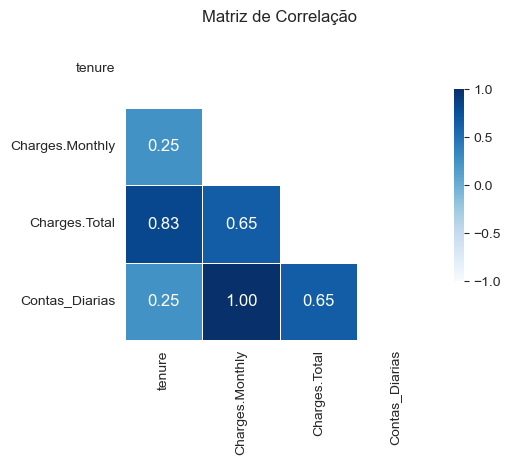

In [181]:
display(Markdown("### Correlação"))

corr = df_filtrado.corr(numeric_only=True)

# Gerar uma máscara para o triângulo
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style("white")

# Configurar a figura
f, ax = plt.subplots(figsize=(5, 5))
ax.set_title('Matriz de Correlação')

# Gerar um mapa de calor divergente
cmap = sns.color_palette("Blues", as_cmap=True)

# Faz o mapa de calor com a máscara e a proporção correta
chart = sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    ax=ax, annot=True, fmt=".2f",  annot_kws={"size": 12}
)
plt.show()

C:\Users\mulle\AppData\Local\Temp\ipykernel_18560\2429477773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Churn'] = pd.to_numeric(df_filtrado['Churn'], errors='coerce')
C:\Users\mulle\AppData\Local\Temp\ipykernel_18560\2429477773.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_churn["Churn"], y=corr_churn.index, palette="Blues")


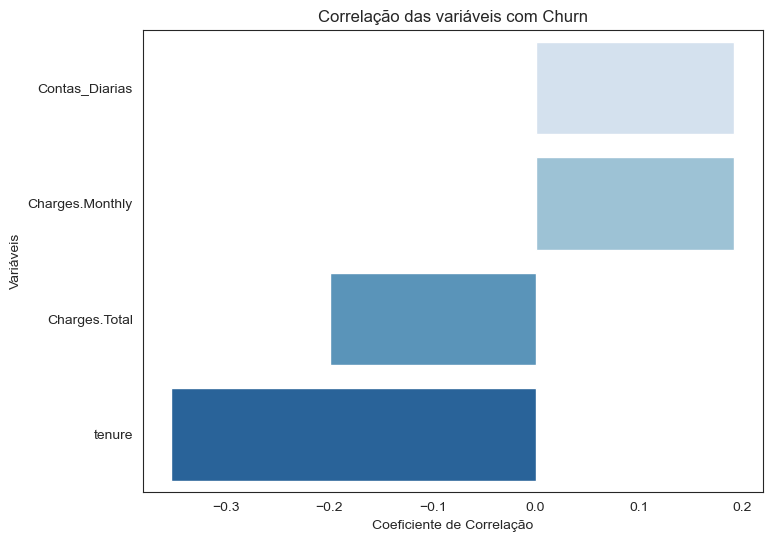

In [182]:
# Calcular a matriz de correlação
# Converte a coluna 'Churn' para numérico antes de calcular a correlação
df_filtrado['Churn'] = pd.to_numeric(df_filtrado['Churn'], errors='coerce')
corr = df_filtrado.corr(numeric_only=True)

# Extrair a correlação de todas as variáveis com 'Churn'
corr_churn = corr[["Churn"]].drop("Churn")  # Remove a correlação de Churn consigo mesmo

# Opcional: ordenar os valores para melhor visualização
corr_churn = corr_churn.sort_values(by="Churn", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=corr_churn["Churn"], y=corr_churn.index, palette="Blues")
plt.title("Correlação das variáveis com Churn")
plt.xlabel("Coeficiente de Correlação")
plt.ylabel("Variáveis")
plt.show()


---
### Análise da Correlação com `Churn`

| Variável          | Correlação com Churn | Interpretação                                                                             |
| ----------------- | -------------------- | ----------------------------------------------------------------------------------------- |
| `tenure`          | \~ -0.35             | Correlação negativa moderada — quanto mais tempo o cliente está, menor a chance de churn. |
| `Charges.Total`   | \~ -0.20             | Correlação negativa leve — clientes que pagam mais ao longo do tempo tendem a ficar.      |
| `Charges.Monthly` | \~ 0.20              | Correlação positiva leve — mensalidades altas podem estar ligadas ao churn.               |
| `Contas_Diarias`  | \~ 0.20              | Correlação positiva leve — mais contas diárias pode indicar tendência ao churn.           |
---

## 📝 Relatório Final
---

1. Introdução

    A evasão de clientes, também conhecida como churn, é um desafio crítico para empresas de telecomunicações, refletindo diretamente na receita e na sustentabilidade do negócio. O objetivo deste trabalho é analisar dados de clientes da TelecomX, identificar padrões relacionados à evasão e fornecer recomendações para mitigar esse comportamento.

2. Limpeza e Tratamento de Dados

    📥 Importação dos Dados

    Os dados foram obtidos de um arquivo JSON hospedado no GitHub e continham colunas aninhadas (customer, phone, internet, account) que foram convertidas e expandidas utilizando pd.json_normalize.

    🧹 Tratamentos Realizados

    - Conversão de colunas aninhadas em colunas individuais.

    - Conversão de valores numéricos mal formatados, como Charges.Total, para tipo float.

    - Remoção de valores ausentes, especialmente em colunas críticas para análise.

    - Verificação da integridade dos dados com análise de tipos, valores únicos e nulos.

3. Análise Exploratória de Dados

    📊 Análise dos Gráficos de Barras

    - Gênero: A taxa de churn é similar entre homens e mulheres, indicando que gênero não é um fator discriminante.

    - Idosos (Senior Citizen): Clientes idosos apresentam uma taxa de churn significativamente maior (~40,9%), sugerindo possíveis dificuldades tecnológicas ou falta de adaptação.

    - Serviço Telefônico (Phone Service): Pouca variação nas taxas de churn entre usuários com ou sem serviço telefônico.

    - Serviço de Internet (Internet Service): Clientes com fibra óptica têm a maior taxa de churn (~41,9%), possivelmente devido a preços mais altos ou expectativas não atendidas.

    - Segurança Online (Online Security): Clientes com segurança online possuem taxas de churn muito menores (~14,6%), indicando um efeito de retenção positivo.

    - Suporte Técnico (Tech Support): Similar à segurança online: menor churn entre clientes com suporte técnico (~15,2%).

    - Streaming TV: Clientes com serviço de streaming de TV apresentam taxas de churn mais altas (~32,5%), o que pode estar ligado a custos ou insatisfação com o serviço.

    - Streaming de Filmes: Tendência semelhante à TV, com churn elevado (~30%).

    - Tipo de Contrato (Contract): 

        Month-to-month: Churn extremamente alto (~42,7%).

        One year: Churn baixo (~11,3%).

        Two year: Churn muito baixo (~2,4%).

        Contratos de maior duração são um dos fatores mais fortes de retenção.

    - Método de Pagamento: O cheque eletrônico está associado à maior taxa de churn (~45,3%), possivelmente por ser utilizado por clientes menos engajados ou com menor acesso a meios automáticos de pagamento.

    📉 Análise dos Histogramas e Boxplots

    - Tenure (Tempo de Relacionamento): Clientes que cancelam possuem tempo de contrato significativamente menor, reforçando a importância do relacionamento inicial.

    - Cobranças Mensais (Monthly Charges): Clientes com churn tendem a pagar valores mensais mais altos, indicando sensibilidade ao preço.

    - Cobranças Totais (Total Charges): Clientes fiéis acumulam valores totais muito mais altos, o que reforça a ideia de que o churn ocorre cedo no ciclo de vida do cliente.

    - Contas Diárias (Daily Accounts): O padrão de uso difere entre clientes que permanecem e os que cancelam. Baixo uso ou alta variabilidade pode indicar risco de churn.

    📈 Correlação com Churn

    - tenure: Correlação negativa significativa — clientes mais antigos tendem a permanecer.

    - Charges.Total: Correlação negativa moderada.

    - Charges.Monthly e Contas_Diarias: Correlação positiva leve — custos mais altos e/ou variação de uso podem levar ao churn.

4. Conclusões e Insights

   - Tempo de contrato curto, custo mensal elevado e uso de serviços adicionais como streaming estão relacionados a maiores taxas de churn.

   - Contratos longos, serviços adicionais de suporte técnico e segurança, e pagamentos automáticos estão associados a menor evasão.

   - Idosos apresentam risco aumentado de churn, indicando necessidade de ações específicas para esse público.

5. Recomendações

    🔧 1. Fortalecer o Relacionamento Inicial

        Oferecer bônus, suporte extra e programas de fidelidade nos primeiros 6 meses.

    💰 2. Avaliar Planos com Cobrança Mensal Alta

        Criar planos personalizados e campanhas de upgrade para equilibrar custo-benefício.

    📞 3. Expandir Serviços de Suporte e Segurança

        Promover pacotes com segurança online e suporte técnico como benefícios de retenção.

    📝 4. Incentivar Contratos de Longo Prazo

        Oferecer descontos, bônus ou vantagens para clientes que optarem por contratos anuais ou bienais.

    💳 5. Migrar Clientes para Métodos de Pagamento Automáticos

        Campanhas educativas e incentivos para adesão a cartão de crédito ou débito automático.

    👵 6. Estratégias Específicas para Idosos

        Atendimento personalizado, tutoriais e suporte para familiarização com tecnologia.